In [ ]:
import pandas as pd
import numpy as np
from numpy import arange
from numpy import isnan
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score , precision_score , roc_auc_score ,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dkmacovid_train.csv to dkmacovid_train.csv


# **CM1**

In [ ]:
#loading the data
df_covid= pd.read_csv("dkmacovid_train.csv")
#describing the data
df_covid.describe()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Density Rank 2020 Census,SexRatio
count,1380.000000,1380.000000,1380.000000,1380.000000,1.380000e+03,1380.000000,1.380000e+03,1380.000000,1380.000000,1380.000000,1380.000000
mean,16.500000,25.239130,39.470717,-92.879928,2.610390e+05,7203.192905,5.271097e+06,1.631757,91763.237514,27.173913,97.760870
std,8.658579,14.513405,6.070494,19.632514,4.914059e+05,2305.025102,6.991478e+06,0.656702,40858.185997,15.378197,3.219219
min,2.000000,1.000000,21.094300,-157.498300,9.550000e+02,1232.233261,3.739460e+05,0.439598,30524.071590,1.000000,94.000000
25%,9.000000,12.000000,35.630100,-105.311100,2.731600e+04,6042.134459,1.310515e+06,1.246993,67457.197525,13.000000,95.000000
50%,16.500000,25.500000,39.583950,-88.259400,1.005915e+05,7453.675956,2.919566e+06,1.499993,85438.613770,28.500000,97.000000
75%,24.000000,37.000000,43.326600,-77.209800,2.592418e+05,8621.924085,6.093790e+06,1.817013,104509.453475,41.000000,99.000000
max,31.000000,51.000000,61.370700,-69.381900,3.283336e+06,12811.162350,4.227902e+07,3.928767,235733.711200,52.000000,109.000000


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day                              1380 non-null   int64  
 1   State ID                         1380 non-null   int64  
 2   State                            1380 non-null   object 
 3   Lat                              1380 non-null   float64
 4   Long_                            1380 non-null   float64
 5   Active                           1380 non-null   int64  
 6   Incident_Rate                    1380 non-null   float64
 7   Total_Test_Results               1380 non-null   int64  
 8   Case_Fatality_Ratio              1380 non-null   float64
 9   Testing_Rate                     1380 non-null   float64
 10  Resident Population 2020 Census  1380 non-null   object 
 11  Population Density 2020 Census   1380 non-null   object 
 12  Density Rank 2020 Ce

In [ ]:
# rows that contain duplicate value
dup_covid = df_covid.duplicated()
print(dup_covid.any())

# Finding missing values in the data sets
print(df_covid.isnull().sum())

False
Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
Confirmed                          0
Deaths                             0
Recovered                          0
dtype: int64


In [ ]:
#sorting rows by State ID and Day
df_covid_sorted = df_covid.sort_values(by=["State ID","Day"])

In [ ]:
#encoding the labels into binary values
df_covid_sorted[['Confirmed', 'Deaths', 'Recovered']] = df_covid_sorted[['Confirmed', 'Deaths', 'Recovered']].astype(int)

In [ ]:
#rounding off the values to 2 decimal places for better understanding of our data
df_covid_sorted = df_covid_sorted.round(2)

In [ ]:
df_covid_sorted.head(5)

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.32,-86.9,162449,7535.06,1891468,1.32,38576.31,"5,024,279",99.2,29,94,1,0,0
46,3,1,Alabama,32.32,-86.9,164924,7585.56,1900070,1.31,38751.75,"5,024,279",99.2,29,94,1,1,0
92,4,1,Alabama,32.32,-86.9,167080,7629.63,1903388,1.30,38819.42,"5,024,279",99.2,29,94,1,1,0
138,5,1,Alabama,32.32,-86.9,172570,7741.76,1910881,1.29,38972.24,"5,024,279",99.2,29,94,1,1,0
184,6,1,Alabama,32.32,-86.9,167506,7835.40,1921210,1.30,39182.90,"5,024,279",99.2,29,94,1,1,1


In [ ]:
#converting the string type variables into int and float 
df_covid_sorted['Resident Population 2020 Census']=df_covid_sorted['Resident Population 2020 Census'].str.replace(',','')
df_covid_sorted['Resident Population 2020 Census'] = df_covid_sorted['Resident Population 2020 Census'].astype(int)

df_covid_sorted['Population Density 2020 Census']=df_covid_sorted['Population Density 2020 Census'].str.replace(',','')
df_covid_sorted['Population Density 2020 Census'] = df_covid_sorted['Population Density 2020 Census'].astype(float)

In [ ]:
df_covid_sorted.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.32,-86.9,162449,7535.06,1891468,1.32,38576.31,5024279,99.2,29,94,1,0,0
46,3,1,Alabama,32.32,-86.9,164924,7585.56,1900070,1.31,38751.75,5024279,99.2,29,94,1,1,0
92,4,1,Alabama,32.32,-86.9,167080,7629.63,1903388,1.30,38819.42,5024279,99.2,29,94,1,1,0
138,5,1,Alabama,32.32,-86.9,172570,7741.76,1910881,1.29,38972.24,5024279,99.2,29,94,1,1,0
184,6,1,Alabama,32.32,-86.9,167506,7835.40,1921210,1.30,39182.90,5024279,99.2,29,94,1,1,1


In [ ]:
#detecting and removing outliers for the columns 5 to 9  
for col in df_covid_sorted.columns[5:10]:
  Q1=df_covid_sorted[col].quantile(0.25)
  Q3=df_covid_sorted[col].quantile(0.75)
  IQR=Q3-Q1
  df_final=df_covid_sorted[~((df_covid_sorted[col]<(Q1-1.5*IQR)) | (df_covid_sorted[col]>(Q3+1.5*IQR)))]
  df_final
print(df_final.shape) 

(1252, 17)


In [ ]:
print(df_covid_sorted.shape)

(1380, 17)


In [ ]:
df_final=df_final.drop(['State','Lat','Long_'],axis=1)

In [ ]:
#Z score normalization
df_z = df_final.copy()
columns_to_scale = ['Active',	'Incident_Rate',	'Total_Test_Results',	'Case_Fatality_Ratio',	'Testing_Rate', 'Resident Population 2020 Census','Population Density 2020 Census',	'Density Rank 2020 Census',	'SexRatio']
stds = StandardScaler()
df_z[columns_to_scale] = stds.fit_transform(df_z[columns_to_scale])

print(df_z)
print(df_z.shape)

      Day  State ID    Active  ...  Confirmed  Deaths  Recovered
0       2         1 -0.224294  ...          1       0          0
46      3         1 -0.219430  ...          1       1          0
92      4         1 -0.215193  ...          1       1          0
138     5         1 -0.204403  ...          1       1          0
184     6         1 -0.214356  ...          1       1          1
...   ...       ...       ...  ...        ...     ...        ...
1195   27        51 -0.540736  ...          1       0          1
1241   28        51 -0.541114  ...          1       0          1
1287   29        51 -0.540982  ...          1       0          1
1333   30        51 -0.541340  ...          1       0          1
1379   31        51 -0.540974  ...          1       0          1

[1252 rows x 14 columns]
(1252, 14)


In [ ]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1379
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day                              1252 non-null   int64  
 1   State ID                         1252 non-null   int64  
 2   Active                           1252 non-null   float64
 3   Incident_Rate                    1252 non-null   float64
 4   Total_Test_Results               1252 non-null   float64
 5   Case_Fatality_Ratio              1252 non-null   float64
 6   Testing_Rate                     1252 non-null   float64
 7   Resident Population 2020 Census  1252 non-null   float64
 8   Population Density 2020 Census   1252 non-null   float64
 9   Density Rank 2020 Census         1252 non-null   float64
 10  SexRatio                         1252 non-null   float64
 11  Confirmed                        1252 non-null   int64  
 12  Deaths              

In [ ]:
#Min max normalization

df_mm = df_final.copy()


#for column in columns_to_scale:
df_mm[columns_to_scale] = (df_mm[columns_to_scale] - df_mm[columns_to_scale].min()) / (df_mm[columns_to_scale].max() - df_mm[columns_to_scale].min())    

print(df_mm)
print(df_mm.shape)

      Day  State ID    Active  ...  Confirmed  Deaths  Recovered
0       2         1  0.049159  ...          1       0          0
46      3         1  0.049913  ...          1       1          0
92      4         1  0.050570  ...          1       1          0
138     5         1  0.052242  ...          1       1          0
184     6         1  0.050700  ...          1       1          1
...   ...       ...       ...  ...        ...     ...        ...
1195   27        51  0.000102  ...          1       0          1
1241   28        51  0.000044  ...          1       0          1
1287   29        51  0.000064  ...          1       0          1
1333   30        51  0.000009  ...          1       0          1
1379   31        51  0.000066  ...          1       0          1

[1252 rows x 14 columns]
(1252, 14)


In [ ]:
df_mm.head()

,Day,State ID,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,0.049159,0.572770,0.036213,0.250000,0.062185,0.11415,0.008276,0.56,0.0,1,0,0
46,3,1,0.049913,0.577359,0.036419,0.247126,0.063540,0.11415,0.008276,0.56,0.0,1,1,0
92,4,1,0.050570,0.581364,0.036498,0.244253,0.064062,0.11415,0.008276,0.56,0.0,1,1,0
138,5,1,0.052242,0.591554,0.036677,0.241379,0.065243,0.11415,0.008276,0.56,0.0,1,1,0
184,6,1,0.050700,0.600063,0.036923,0.244253,0.066869,0.11415,0.008276,0.56,0.0,1,1,1


## **CM2**

In [ ]:
from sklearn.decomposition import PCA
pca_cov = PCA(n_components=5)
principalComponents_cov = pca_cov.fit_transform(df_z)

In [ ]:
principal_cov = pd.DataFrame(data = principalComponents_cov
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principal_cov.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
1247,25.806829,10.535442,-1.613357,0.738861,1.922924
1248,25.810194,11.535968,-1.601379,0.716921,1.939658
1249,25.813696,12.537025,-1.595049,0.704152,1.962780
1250,25.816942,13.536579,-1.595930,0.696944,1.950044
1251,25.820157,14.536511,-1.598980,0.694887,1.938181


In [ ]:
pca_cov.explained_variance_ 

array([210.58039159,  74.4272718 ,   3.26306123,   2.27431659,
         0.98204884])

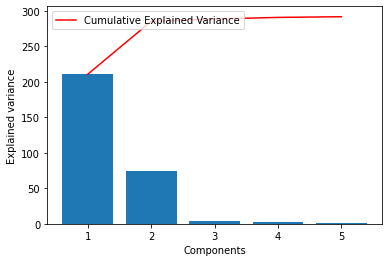

In [ ]:
plt.bar(range(1,len(pca_cov.explained_variance_ )+1),pca_cov.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_cov.explained_variance_ )+1),
         np.cumsum(pca_cov.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

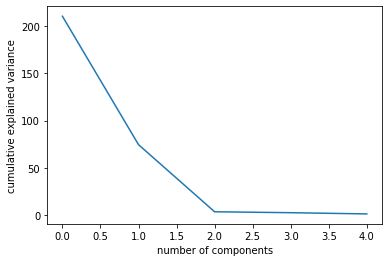

In [ ]:
#scree plot for pca components. For our case, PCA-2 explains most of the variance than subsequent components
plt.plot(pca_cov.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### **CM3**

In [ ]:
df_z.head()

,Day,State ID,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,-0.224294,0.227387,-0.481491,-0.478065,-1.549993,-0.168037,-0.204933,0.118976,-1.374063,1,0,0
46,3,1,-0.219430,0.250101,-0.480268,-0.494182,-1.543741,-0.168037,-0.204933,0.118976,-1.374063,1,1,0
92,4,1,-0.215193,0.269923,-0.479796,-0.510299,-1.541330,-0.168037,-0.204933,0.118976,-1.374063,1,1,0
138,5,1,-0.204403,0.320357,-0.478730,-0.526416,-1.535884,-0.168037,-0.204933,0.118976,-1.374063,1,1,0
184,6,1,-0.214356,0.362474,-0.477261,-0.510299,-1.528377,-0.168037,-0.204933,0.118976,-1.374063,1,1,1


In [ ]:
x = df_z.drop(['Confirmed','Deaths','Recovered'], axis=1)
#y = df_z['Recovered']
y = df_z['Deaths']
#y = df_z['Confirmed']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)

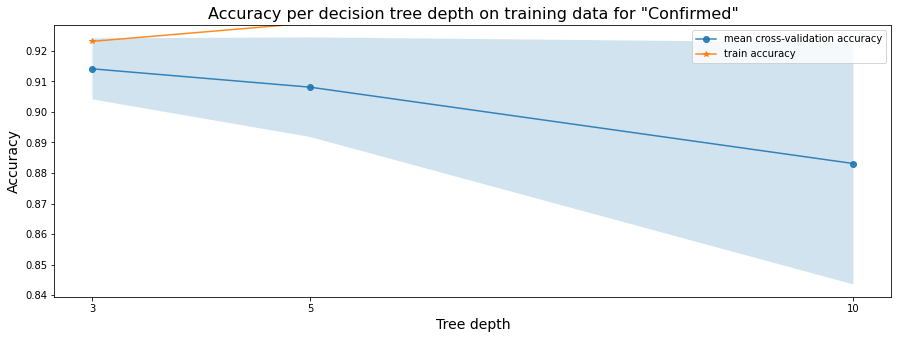

In [ ]:
# defining a function for performing K-fold cross validation
def running_cross_validation(x, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        #tree_model = DecisionTreeClassifier(max_depth=depth,criterion="gini")
        tree_model = DecisionTreeClassifier(max_depth=depth,splitter = 'best',criterion="entropy")
        cv_scores = cross_val_score(tree_model, x, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(x, y).score(x, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# defining a function for plotting cross-validation results
def plot_on_tree_depths(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 3,5,10
input_tree_depths = [3,5,10]
final_cv_scores_mean, final_cv_scores_std, final_accuracy_scores = running_cross_validation(x_train, y_train, input_tree_depths)

# plotting mean accuracy vs maximum depth
plot_on_tree_depths(input_tree_depths, final_cv_scores_mean, final_cv_scores_std, final_accuracy_scores, 
                               'Accuracy per decision tree depth on training data for "Confirmed"')

In [ ]:
# calculating the best tree depth with the best mean accuracy
idx_max = final_cv_scores_mean.argmax()
best_input_tree_depths = input_tree_depths[idx_max]
best_cv_score = final_cv_scores_mean[idx_max]
best_cv_score_std = final_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      best_input_tree_depths, round(best_cv_score*100,5), round(best_cv_score_std*100, 5)))


The depth-3 tree achieves the best mean cross-validation accuracy 91.40796 +/- 0.49981% on training dataset


In [ ]:
# defining a function for training and evaluating a tree
def run_decision_tree(x_train, y_train, x_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(x_train, y_train)
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(x_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 10-depth tree
best_accuracy_train, best_accuracy_test = run_decision_tree(x_train, y_train, 
                                                                          x_test, y_test, 
                                                                          best_input_tree_depths)


Single tree depth:  3
Accuracy, Training Set:  92.70729 %
Accuracy, Test Set:  93.6255 %


### **CM4**

In [ ]:
x = df_z.drop(['Confirmed','Deaths','Recovered'], axis=1)
y = df_z['Recovered']
#y = df_z['Deaths']
#y = df_z['Confirmed']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
tuned_param={'max_depth': [3,5,10,None],'n_estimators': [5,10,50,150,200]}
model=GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid=tuned_param,cv=3,return_train_score=True)
model.fit(x_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [ ]:
print("Best hyper paramters:",model.best_params_)
print("Best accuracy value: ",model.best_score_ )


Best hyper paramters: {'max_depth': 5, 'n_estimators': 10}
Best accuracy value:  0.9420258581935229


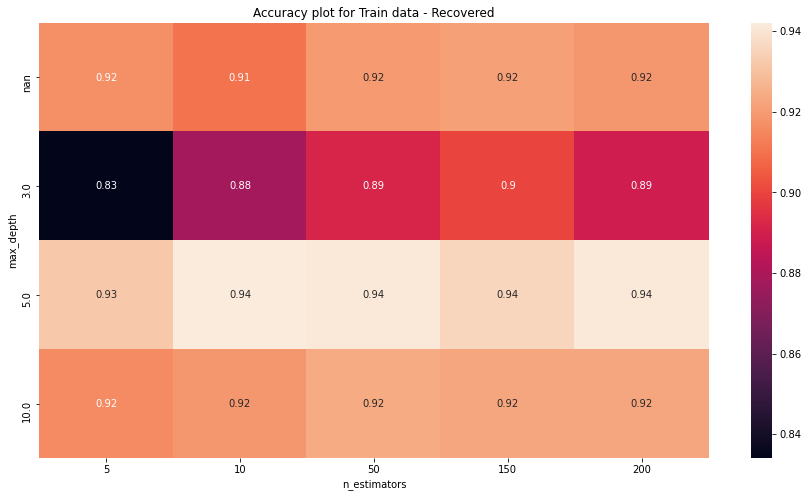

In [ ]:
plot_df=pd.DataFrame(model.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
plot_df["accuracy"]=model.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
plot_df=plot_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=plot_df,annot=True)
plt.title("Accuracy plot for Train data - Recovered")
plt.show()

### **CM5**

In [ ]:
df_z.head()

,Day,State ID,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,-0.224294,0.227387,-0.481491,-0.478065,-1.549993,-0.168037,-0.204933,0.118976,-1.374063,1,0,0
46,3,1,-0.219430,0.250101,-0.480268,-0.494182,-1.543741,-0.168037,-0.204933,0.118976,-1.374063,1,1,0
92,4,1,-0.215193,0.269923,-0.479796,-0.510299,-1.541330,-0.168037,-0.204933,0.118976,-1.374063,1,1,0
138,5,1,-0.204403,0.320357,-0.478730,-0.526416,-1.535884,-0.168037,-0.204933,0.118976,-1.374063,1,1,0
184,6,1,-0.214356,0.362474,-0.477261,-0.510299,-1.528377,-0.168037,-0.204933,0.118976,-1.374063,1,1,1


In [ ]:
x = df_z.drop(['Confirmed','Deaths','Recovered'], axis=1)
y = df_z['Recovered']
#y = df_z['Deaths']
#y = df_z['Confirmed']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)

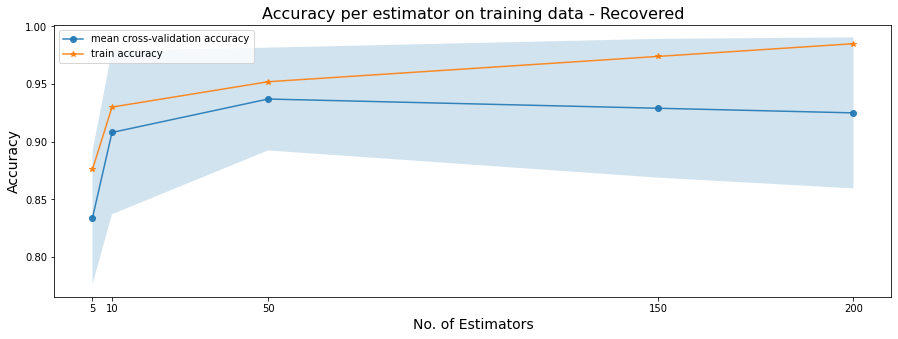

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def run_cross_validation(x, y, n_estimators, cv=5, scoring='accuracy'):
    scores_list = []
    scores_std = []
    scores_mean = []
    accuracy_scores = []
    for estimators in n_estimators:
        model = GradientBoostingClassifier(n_estimators = estimators)
        scores = cross_val_score(model, x, y, cv=cv, scoring=scoring)
        scores_list.append(scores)
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        accuracy_scores.append(model.fit(x, y).score(x, y))
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return scores_mean, scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_graph(estimators, scores_mean, scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(estimators, scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(estimators, scores_mean-2*scores_std, scores_mean+2*scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(estimators, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('No. of Estimators', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(estimators)
    ax.legend()

# giving input estimators
input_estimators = [5,10,50,150,200]
final_scores_mean, final_scores_std, final_accuracy_scores = run_cross_validation(x_train, y_train, input_estimators)

# plotting accuracy
plot_graph(input_estimators, final_scores_mean, final_scores_std, final_accuracy_scores, 
                               'Accuracy per estimator on training data - Recovered')

In [ ]:
idx_max = final_scores_mean.argmax()
best_estimator = input_estimators[idx_max]
best_score = final_scores_mean[idx_max]
best_score_std = final_scores_std[idx_max]
print('Total of {} estimators achieve the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      best_estimator, round(best_score*100,5), round(best_score_std*100, 5)))

Total of 50 estimators achieve the best mean cross-validation accuracy 93.70597 +/- 2.22794% on training dataset


In [ ]:
# function for training and evaluating a tree
def run_model(x_train, y_train, x_test, y_test, estimators):
    model = GradientBoostingClassifier(n_estimators=estimators).fit(x_train, y_train)
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(x_test, y_test)
    print('Estimators: ', estimators)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 3-depth tree
best_accuracy_train, best_accuracy_test = run_model(x_train, y_train, x_test, y_test,best_estimator)


Estimators:  50
Accuracy, Training Set:  95.1049 %
Accuracy, Test Set:  94.42231 %


### **CM6**

In [ ]:
x = df_z.drop(['Confirmed','Deaths','Recovered'], axis=1)
#y = df_z['Recovered']
#y = df_z['Deaths']
y = df_z['Confirmed']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#hyperparameters to be tuned.
var_smoothing_list = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]

accuracy = []

gnb_recovered1 = GaussianNB()

# define grid search
grid = dict(var_smoothing = var_smoothing_list)
#using cv = 10 for 10-fold cross validation as mentioned in the instructions. 
grid_search3 = GridSearchCV(estimator = gnb_recovered1, param_grid = grid, n_jobs = -1, cv = 10, scoring = 'accuracy',error_score = 0)
grid_result3 = grid_search3.fit(x_train, y_train)

# summarize results
print("Best: {0} using {1}".format(grid_result3.best_score_, grid_result3.best_params_))
acc = grid_result3.cv_results_['mean_test_score']
params = grid_result3.cv_results_['params']
for mean, param in zip(acc,  params):
    print("{0} with: {1}".format(mean, param))

Best: 0.7112772277227722 using {'var_smoothing': 0.1}
0.6763564356435643 with: {'var_smoothing': 1e-10}
0.6763564356435643 with: {'var_smoothing': 1e-09}
0.6773465346534653 with: {'var_smoothing': 1e-05}
0.6993168316831684 with: {'var_smoothing': 0.001}
0.7112772277227722 with: {'var_smoothing': 0.1}
